### Using Jupyter Notebook as a Command Line & Installing Packages
Before diving into data visualizations, it's important to understand how to use Jupyter Notebook as a command line to install and manage Python packages.



Running Shell Commands in Jupyter Notebook
In Jupyter Notebook, you can run command-line commands using:

! (exclamation mark) → Runs a shell command inside a code cell.

%%bash (cell magic) → Runs multiple shell commands in a cell.

In [27]:
## Let's try to install some packages.

!pip install biopython

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# If it's installed you're fine, let's try something else.

!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [38]:
# Let's install multiple packages!

!pip install numpy pandas seaborn

Defaulting to user installation because normal site-packages is not writeable


In [30]:
# Let's check what are the packages installed in this computer.

!pip list

Package                 Version
----------------------- ----------------
appdirs                 1.4.4
apturl                  0.5.2
argon2-cffi             21.1.0
attrs                   21.2.0
Babel                   2.8.0
backcall                0.2.0
bcrypt                  3.2.0
beautifulsoup4          4.10.0
beniget                 0.4.1
biopython               1.79
bleach                  4.1.0
blinker                 1.4
Bottleneck              1.3.2
Brlapi                  0.8.3
Brotli                  1.0.9
BUSCO                   5.2.2
certifi                 2020.6.20
chardet                 4.0.0
click                   8.0.3
colorama                0.4.4
coloredlogs             7.3
colormath               3.0.0
command-not-found       0.3
commonmark              0.9.1
cryptography            3.4.8
cupshelpers             1.0
cycler                  0.11.0
dbus-python             1.2.18
decorator               4.4.2
defer                   1.0.6
defusedxml              0.7

In [31]:
# To see a spesific package...

!pip show matplotlib

Name: matplotlib
Version: 3.5.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/lib/python3/dist-packages
Requires: 
Required-by: seaborn


In [32]:
# upgrading a package

!pip install --upgrade pandas


Defaulting to user installation because normal site-packages is not writeable


### Using %pip Instead of !pip
Jupyter allows %pip magic commands, which are safer inside notebooks



In [33]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
# What about command line inputs?

!ls

001_introduction.ipynb		  006_data_analytics_introduction.ipynb
002_input_handling.ipynb	  data
003_conditional_statements.ipynb  data_visualisations.ipynb
004_loops.ipynb			  visual_examples
005_file_input_output.ipynb


In [10]:
# hmm, can I create a file here?

In [35]:
# Let's try it
!touch hello.py

In [12]:
!ls

001_introduction.ipynb		  006_data_analytics_introduction.ipynb
002_input_handling.ipynb	  data
003_conditional_statements.ipynb  data_visualisations.ipynb
004_loops.ipynb			  extracted_variants.csv
005_file_input_output.ipynb	  hello.py


In [36]:
# Can I check the python location? Of course you can

!which python3

/usr/bin/python3


In [ ]:
# From now on we will dive into the visualisation prepare your eyes!

## Steps for Data Visualization in Python

Data visualization involves several key steps to ensure the data is properly prepared, analyzed, and effectively visualized. Below is a structured approach you can follow.

### Summary of the Steps

1. Understand the Data → Check .head(), .info()

2. Clean & Preprocess the Data → Handle missing values, fix types

3. Choose the Right Visualization → Pick a plot type based on goals

4. Create the Plot → Use Matplotlib or Seaborn

5. Customize the Visualization → Improve colors, labels, styles

6. Add Annotations → Highlight key points

7. Use Interactive Plots (Optional) → Plotly, mplcursors

8. Save & Export the Figure → .png, .pdf, .svg

## Different plots serve different purposes.

Distribution of a single variable	Histogram, KDE Plot

Comparing categories	Bar Chart, Box Plot

Showing trends over time	Line Chart

Finding relationships	Scatter Plot, Heatmap

## Example: Selecting a Visualization

Want to see variant quality score distribution? → Use a histogram.

Want to compare AMR resistance across genes? → Use a bar chart.

Want to explore allele frequency vs. quality? → Use a scatter plot.

In [39]:
# Don't forget to import modules that you're going to use!

import pandas as pd

# then the file that you're going to use.

vcf_file_path = "data/test.vcf"

# creating an empyty list
vcf_data = []

# Open the VCF file and read line by line
with open(vcf_file_path, "r") as file:
    for line in file:
        if not line.startswith("#"):  # Ignore metadata and header lines
            columns = line.strip().split("\t")
            chrom = columns[0]  # Chromosome
            pos = columns[1]  # Position
            ref = columns[3]  # Reference allele
            alt = columns[4]  # Alternate allele
            qual = columns[5]  # Quality score

            # Store extracted data
            vcf_data.append([chrom, pos, ref, alt, qual])
            
# Convert extracted data into a DataFrame
vcf_df = pd.DataFrame(vcf_data, columns=["Chromosome", "Position", "Reference", "Alternate", "Quality"])


# Ensure numeric data types for processing
vcf_df["Position"] = pd.to_numeric(vcf_df["Position"], errors="coerce")
vcf_df["Quality"] = pd.to_numeric(vcf_df["Quality"], errors="coerce")



In [40]:
# Real visualisation starts here...

import matplotlib.pyplot as plt



# Create a histogram for Quality Score distribution
plt.figure(figsize=(8, 5))  # Set figure size
plt.hist(vcf_df["Quality"], bins=30, color="skyblue", edgecolor="black")  # Plot histogram
plt.xlabel("Quality Score")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.title("Distribution of Quality Scores in VCF Data")  # Plot title
plt.show()  # Display the plot


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

Understanding matplotlib Parameters
Encourage participants to modify key parameters one by one and observe the effect.

figsize=(width, height)	Controls figure size	figsize=(10, 6)

bins=	Defines number of histogram bars	    bins=50 (more bars)

color=	Changes bar color	"red", "green",     "skyblue"

edgecolor=	Changes border color of bars	    "black", "white"

alpha=	             Adjusts transparency       alpha=0.7 (semi-transparent)

### Experimenting with Color Customization

Matplotlib supports color names, RGB values, and hex codes.



(array([3., 2., 2., 3., 2., 2., 3., 3., 2., 3., 2., 3., 2., 3., 3., 3., 2.,
        2., 3., 2., 2., 2., 3., 2., 2., 2., 3., 2., 2., 3.]),
 array([ 0.        ,  2.26666667,  4.53333333,  6.8       ,  9.06666667,
        11.33333333, 13.6       , 15.86666667, 18.13333333, 20.4       ,
        22.66666667, 24.93333333, 27.2       , 29.46666667, 31.73333333,
        34.        , 36.26666667, 38.53333333, 40.8       , 43.06666667,
        45.33333333, 47.6       , 49.86666667, 52.13333333, 54.4       ,
        56.66666667, 58.93333333, 61.2       , 63.46666667, 65.73333333,
        68.        ]),
 <BarContainer object of 30 artists>)

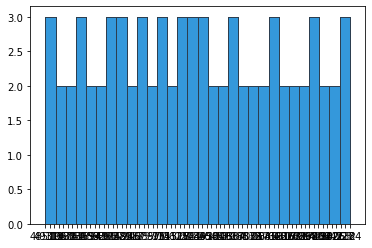

In [25]:
# Here is the example

plt.hist(vcf_df["Quality"], bins=30, color="red", edgecolor="black")

# with hex code

plt.hist(vcf_df["Quality"], bins=30, color="#3498db", edgecolor="#2c3e50")  # Blue shades

# Using RGB
plt.hist(vcf_df["Quality"], bins=30, color=(0.2, 0.6, 0.8), edgecolor=(0.1, 0.3, 0.5))


In [ ]:
# We can experiment with bins which relates with number of bars.
plt.hist(vcf_df["Quality"], bins=10)  # Fewer bars
plt.hist(vcf_df["Quality"], bins=50)  # More bars

# We can adjust transparency with alpha

plt.hist(vcf_df["Quality"], bins=30, color="blue", alpha=0.5)  # 50% transparency



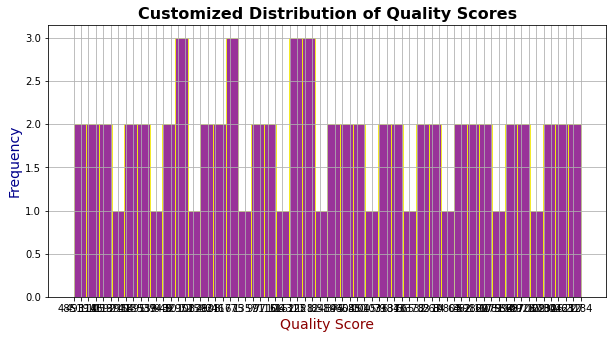

In [26]:
# Final Version...

plt.figure(figsize=(10, 5))  # Adjust figure size
plt.hist(vcf_df["Quality"], bins=40, color="purple", edgecolor="yellow", alpha=0.8)
plt.xlabel("Quality Score", fontsize=14, color="darkred")  # Modify text size & color
plt.ylabel("Frequency", fontsize=14, color="darkblue")
plt.title("Customized Distribution of Quality Scores", fontsize=16, fontweight="bold")
plt.grid(True)  # Add grid for better visibility
plt.show()


In [ ]:
# CODE PLAYGROUND

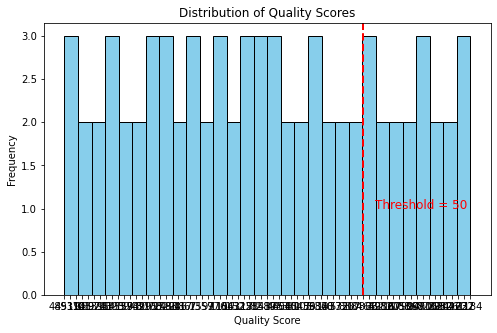

In [40]:
plt.figure(figsize=(8, 5))
plt.hist(vcf_df["Quality"], bins=30, color="skyblue", edgecolor="black")

# Highlight quality scores above 50
plt.axvline(x=50, color="red", linestyle="dashed", linewidth=2)  
plt.text(52, 1, "Threshold = 50", fontsize=12, color="red")

plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.title("Distribution of Quality Scores")
plt.show()


Summary

✔ Use plt.text() for simple labels.

✔ Use plt.annotate() for arrows and text positioning.

✔ Use plt.axvline() or plt.axhline() to mark thresholds.

✔ Loop through data for dynamic annotations.


# Add different visualisation types with different data types.

In [ ]:
# CODE PLAYGROUND

# Problem 1: Visualizing AMR Gene Distribution
### Scenario
You are analyzing an **Antimicrobial Resistance (AMR) dataset** and want to understand the **distribution of different resistance genes** in the dataset.

### Task
Write a Python script that:
1. **Reads an AMR dataset (CSV file)** containing gene names and resistance classes.
2. **Counts the occurrences of each resistance class** in the dataset.
3. **Creates a bar chart** to visualize the number of genes in each resistance class using **Matplotlib or Seaborn**.
4. **Adds appropriate labels and titles** for better readability.

### Example Input (AMR Dataset Sample)
| Sample_ID | Gene      | Resistance_Class |
|-----------|----------|------------------|
| Sample_1  | blaCTX-M | Beta-lactam      |
| Sample_2  | mecA     | Methicillin      |
| Sample_3  | tetM     | Tetracycline     |
| Sample_4  | aadA1    | Aminoglycoside   |
| Sample_5  | ermB     | Macrolide        |

###  Expected Output
A **bar chart** showing the count of genes in each **resistance class**.


In [ ]:
# CODE PLAYGROUND

In [ ]:
# CODE PLAYGROUND

# Problem 2: Analyzing Variant Quality Scores
### Scenario
You are analyzing **genetic variant data** from a **VCF file** and want to examine the **quality scores** of the variants.

### Task
Write a Python script that:
1. **Reads a VCF file** and extracts **variant quality scores**.
2. **Plots a histogram** of the quality scores using **Matplotlib or Seaborn**.
3. **Highlights the threshold** (e.g., quality > 50) with a vertical dashed line.
4. **Adds labels, titles, and improves the visualization** for clarity.

### Example Input (VCF File Sample)
| Chromosome | Position | Reference | Alternate | Quality |
|------------|----------|-----------|-----------|---------|
| NC_045512.2 | 1055     | G         | A         | 1592    |
| NC_045512.2 | 1267     | C         | T         | 9741    |
| NC_045512.2 | 2184     | A         | C         | 154     |
| NC_045512.2 | 2973     | C         | T         | 1395    |
| NC_045512.2 | 3037     | C         | T         | 13537   |

### Expected Output
A **histogram** showing the **distribution of variant quality scores**, with a **dashed vertical line marking quality 50**.


In [ ]:
# CODE PLAYGROUND

In [ ]:
# CODE PLAYGROUND

In [ ]:
# CODE PLAYGROUND

In [ ]:
# **Solution for Problem 1: Visualizing AMR Gene Distribution**

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AMR dataset
amr_df = pd.read_csv("data/Synthetic_AMR_Dataset.csv")

# Count occurrences of each resistance class
resistance_counts = amr_df["Resistance_Class"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=resistance_counts.index, y=resistance_counts.values, palette="viridis")

# Customize the chart
plt.xlabel("Resistance Class", fontsize=14)
plt.ylabel("Number of Genes", fontsize=14)
plt.title("Distribution of AMR Genes by Resistance Class", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# CODE PLAYGROUND

In [ ]:
# **Solution for Problem 2: Analyzing Variant Quality Scores**

import pandas as pd
import matplotlib.pyplot as plt

# Load the VCF file (assuming tab-separated format)
vcf_df = pd.read_csv("data/test.vcf", sep="\t", comment="#", header=None)

# Extract relevant columns (Assuming VCF format: Chrom, Pos, ID, Ref, Alt, Qual, ...)
vcf_df.columns = ["Chromosome", "Position", "ID", "Reference", "Alternate", "Quality"] + list(range(len(vcf_df.columns) - 6))

# Convert Quality column to numeric
vcf_df["Quality"] = pd.to_numeric(vcf_df["Quality"], errors="coerce")

# Create histogram of quality scores
plt.figure(figsize=(10, 6))
plt.hist(vcf_df["Quality"], bins=30, color="skyblue", edgecolor="black", alpha=0.8)

# Highlight quality threshold
plt.axvline(x=50, color="red", linestyle="dashed", linewidth=2)
plt.text(52, 10, "Threshold = 50", fontsize=12, color="red")

# Customize labels and title
plt.xlabel("Quality Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Variant Quality Scores", fontsize=16, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# CODE PLAYGROUND